In [1]:
#import albumentations as A
from PIL import Image
#import cv2
from copy import deepcopy
import json
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
import random
from pycocotools.coco import COCO
from pycocotools import mask as coco_mask
import seaborn as sns


# Cleaned

In [2]:
TRAIN_ANNOS = "/mnt/data/rgn_ijcnn/cleaned/annotations/train.json"
TRAIN = "/mnt/data/rgn_ijcnn/cleaned/train"
with open(TRAIN_ANNOS) as f:
    data = json.load(f)

print(data.keys())

dict_keys(['info', 'licenses', 'images', 'categories', 'annotations'])


In [3]:
annos_df = pd.DataFrame.from_dict(data['annotations'])
annos_df.head()

,segmentation,num_keypoints,area,iscrowd,image_id,bbox,keypoints,category_id,id
0,"[[194.0, 214.5, 197.0, 213.5, 198.5, 211.0, 18...",1,3666.0,0,1,"[182.5, 197.5, 78.0, 47.0]","[225, 225, 2]",1,1
1,"[[226.0, 242.5, 234.0, 238.5, 238.0, 233.5, 24...",1,1360.0,0,2,"[208.5, 202.5, 34.0, 40.0]","[225, 225, 2]",1,2
2,"[[228.0, 229.5, 233.0, 227.5, 235.5, 224.0, 22...",1,330.0,0,3,"[213.5, 214.5, 22.0, 15.0]","[225, 225, 2]",4,3
3,"[[144.0, 213.5, 144.5, 211.0, 141.5, 209.0, 14...",1,2613.0,0,3,"[129.5, 174.5, 67.0, 39.0]","[158, 193, 2]",1,4
4,"[[228.0, 231.5, 234.5, 225.0, 232.0, 222.5, 22...",1,414.0,0,4,"[211.5, 213.5, 23.0, 18.0]","[225, 225, 2]",4,5


In [4]:
def show_categories(annos):
    with open(annos) as f:
        data = json.load(f)

    df = pd.DataFrame.from_dict(data['annotations'])

    num_galaxies = df.shape[0]
    num_cat_1 = df[df["category_id"] == 1].shape[0]
    num_cat_2 = df[df["category_id"] == 2].shape[0]
    num_cat_3 = df[df["category_id"] == 3].shape[0]
    num_cat_4 = df[df["category_id"] == 4].shape[0]

    print(f"Total galaxies: {num_galaxies}")
    print(f"Cat 1 galaxies: {num_cat_1}, {num_cat_1 / num_galaxies:.2f}")
    print(f"Cat 2 galaxies: {num_cat_2}, {num_cat_2 / num_galaxies:.2f}")
    print(f"Cat 3 galaxies: {num_cat_3}, {num_cat_3 / num_galaxies:.2f}")
    print(f"Cat 4 galaxies: {num_cat_4}, {num_cat_4 / num_galaxies:.2f}")

    data = {"FR-II": [100 * num_cat_1 / num_galaxies],
            "FR-I": [100 * num_cat_2 / num_galaxies],
            "FR-X": [100 * num_cat_3 / num_galaxies],
            "R": [100 * num_cat_4 / num_galaxies]}

    df = pd.DataFrame(data=data)
    return df

In [5]:
dfclean = show_categories("/mnt/data/rgn_ijcnn/cleaned/annotations/train.json")

Total galaxies: 2834
Cat 1 galaxies: 1328, 0.47
Cat 2 galaxies: 377, 0.13
Cat 3 galaxies: 400, 0.14
Cat 4 galaxies: 729, 0.26


<Axes: >

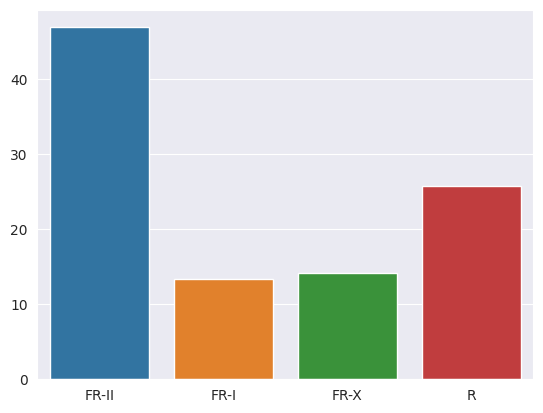

In [6]:
sns.barplot(data=dfclean)

## Rotated

In [7]:
dfrotated = show_categories("/mnt/data/rgn_ijcnn/augmented/rotated_x3/combined/annotations/train.json")

Total galaxies: 7489
Cat 1 galaxies: 2625, 0.35
Cat 2 galaxies: 1299, 0.17
Cat 3 galaxies: 1388, 0.19
Cat 4 galaxies: 2177, 0.29


<Axes: >

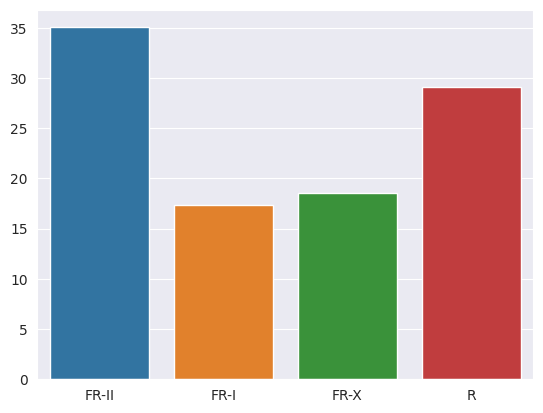

In [8]:
sns.barplot(data=dfrotated)

## Balanced

In [9]:
dfbalanced = show_categories("/mnt/data/rgn_ijcnn/augmented/rotated_x3/combined/annotations/train.json")

Total galaxies: 7489
Cat 1 galaxies: 2625, 0.35
Cat 2 galaxies: 1299, 0.17
Cat 3 galaxies: 1388, 0.19
Cat 4 galaxies: 2177, 0.29


<Axes: >

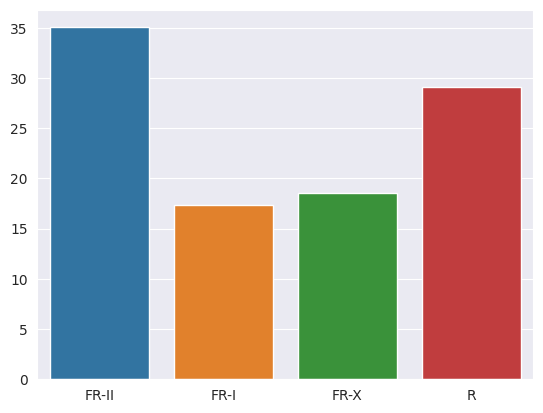

In [10]:
sns.barplot(data=dfbalanced)